# Sentiment Analysis  with final sentiment scores

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('clean_review.csv')

In [9]:
df.head()

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...


### Analyzing the sentiment of reviews using the library 'vader'

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## Defining a function to find the sentiment of a review. 

In [10]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

## Defining a function to extract only the compound score

In [11]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [21]:
df['sentiment_score']=df['review_text'].apply(lambda x:compound_score(x))

In [22]:
df.head()

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text,sentiment_score
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always,-0.3412
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...,0.1265
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...,-0.4019
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like,0.6597
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...,0.0000


## We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [23]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [24]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [25]:
df.head()

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text,sentiment_score,review_category
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always,-0.3412,negative
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...,0.1265,positive
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...,-0.4019,negative
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like,0.6597,positive
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...,0.0000,neutral


## Generating wordclouds separately for positive and negative reviews

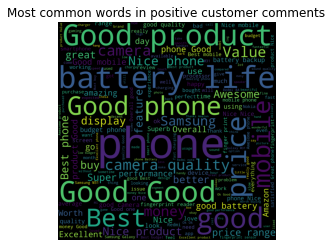

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','review_text'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

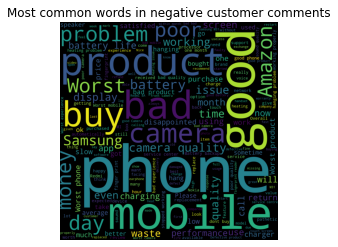

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','review_text'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [33]:
new_df = df.drop(['body', 'rating', 'review_date', 'title', 'rating_class', 'review_text', 'clean_text', 'review_category'], axis=1)

In [34]:
new_df.head()

,product_id,sentiment_score
0,Samsung Galaxy M31s,-0.3412
1,Samsung Galaxy M31s,0.1265
2,Samsung Galaxy M31s,-0.4019
3,Samsung Galaxy M31s,0.6597
4,Samsung Galaxy M31s,0.0000


In [36]:
final_sentiment_score = new_df.groupby(['product_id'])['sentiment_score'].mean()

In [40]:
final_sentiment_score

product_id
Nokia 105                0.388634
OPPO A5                  0.442367
Redmi 8A Sea Blue 2GB    0.383728
Redmi 8A Sea Blue 3GB    0.383469
Redmi 8A Sky White       0.383469
Redmi Note 8             0.417852
Samsung Galaxy M01       0.391081
Samsung Galaxy M21       0.472201
Samsung Galaxy M31       0.398412
Samsung Galaxy M31s      0.525689
Name: sentiment_score, dtype: float64